Chapter 24
# Normality Tests

A large fraction of the field of statistics is concerned with data that assumes that it was drawn from a Gaussian distribution.  If this is not the case, the findings may be misleading or plain wrong.

There is a range of tests you can use to check:
- if your data sample is Gaussian, or sufficiently Gaussian-like, to use the standard techniques
- if your data is sufficiently non-Gaussian to use nonparametric statistical methods
- if your data is in a middle ground where we can assume the data is Gaussian-enough to use parametric methods, or that we can use data preparation techniques to transform the data to be sufficiently Gaussian

There are 3 main areas where you may need to make this evaluation of a data sample:
- input data to the model in the case of fitting models
- model evaluation results in the case of model selection
- residual errors from model predictions in the case of regression

There are 2 classes of technique for checking whether a sample of data is Gaussian:
- Graphical Methods - plotting the data and qualitatively evaluating whether the data looks Gaussian
- Statistical Tests - calculating statistics on the data and quantifying how likely it is that the data was drawn from a Gaussian distribution

# Test Dataset
We will generate a small sample of random numbers drawn from a Gaussian distribution with a mean of 50 and a standard deviation of 5:
- the choice of Gaussian random numbers means that we expect each test set to correctly identify the distribution
- the small-ish sample size may introduce some noise into the results

In [42]:
# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

# seed the random number generator
seed(1)

# generate univariate observations
data = 5 * randn(100) + 50

# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.303 stdv=4.426


# Histogram Plot
A simple and comonly used plot to quickly check the distribution of a sample of data is the histogram, where the data is divided into a pre-specified number of bins.

A histogram can be created using the Matplotlib function hist().  By default, the number of bins is calculated automatically.

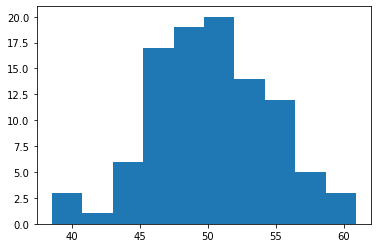

In [43]:
# histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot as plt

# seed the random number generator
seed(1)

# generate univariate observations
data = 5 * randn(100) + 50

# histogram plot
plt.hist(data)
plt.show()

# Quantile-Quantile Plot
The quantile-quantile plot (aka Q-Q plot or QQ plot) generates its own sample of the idealised distribution that we are comparing with (in this case, the Gaussian).  The idealised samples are divided into groups, called quantiles.  Each data point in the sample is paired with a similar member from the idealised distribution at the same cumulative distribution.  The resulting points are plotted as a scatter plot with:
- idealised value on the x-axis
- data sample on the y-axis

A perfect match for the distribution is shown by a line of dots at a 45 degree angle.  Often a line is drawn on the plot to make this expectation clear.

We can develop a QQ plot using the Statsmodels function qqplot():
- by default the function assumes we are comparing the data sample to a Gaussian
- to draw the standardised line, specify the argument line='s'

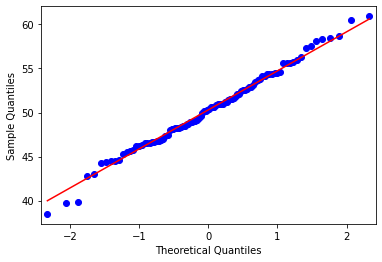

In [44]:
# q-q plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot as plt

# seed the random number generator
seed(1)

# generate univariate observations
data = 5 * randn(100) + 50

# q-q plot
qqplot(data, line='s')
plt.show()

# Statistical Normality Tests
There are many statistical tests that can be used to quantify whether a sample of data looks as though it were drawn from a Gaussian distribution: each makes different assumptions, and considers different aspects of the data.

Each test returns at least 2 things:
- Statistic - a test-specific quantity calculated by the test that can be interpreted in the context of the test by comparing it to critical values from the distribution of the test statistic.  Its interpretation may require a deeper proficicency with statistics, and a deeper knowledge of the specific statistical test.
- p-value - used to interpret the test i.e. whether or not the sample was drawn from a Gaussian.  This can be used to quickly and accurately interpret the statistic in practical applications.

The null hypothesis of the tests (H0) is that the sample was drawn from a Gaussian distribution.  A threshold level is chosen (typically alpha = 5% or 0.05) to interpret the p-value:
- p-value <= alpha - significant result, so reject null hypothesis i.e. not Gaussian
- p-value > alpha - non-significant result, so fail to reject the null hypothesis i.e. Gaussian

In general, we are seeking results with a larger p-value to confirm that our sample was probably drawn from a Gaussian distribution.  Note that a result above 5% does not mean that H0 is true: it means it is very likely true given the available evidence.

The p-value is NOT the probability of the data fitting a Gaussian - it can be thought of as a value that helps us to interpret the statistical test.

# Shapiro-Wilk Test
In practice, this is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data e.g. thousands of observations or fewer

The SciPy function shapiro() will calculate the Shapiro-Wilk on a given dataset, returning both the W-statistic and the p-value

In [45]:
# example of the shapiro-wilk test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# seed the random number generator
seed(1)

# generate univariate observations
data = 5 * randn(100) + 50

# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


# D'Agostino's K2 Test
This test calculates kurtosis and skewness, to determine if the data distribution departs from the normal distribution:
- Skew is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution
- Kurtosis quantifies how much of the distribution is in the tail

The test is available from the SciPy function normaltest(), and returns the test statistic and p-value

In [46]:
# example of the d'agostino and pearson's test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest

# seed the random number generator
seed(1)

# generate univariate observations
data = 5 * randn(100) + 50

# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)


# Anderson-Darling Test
This can be used to evaluate whether a data sample comes from one of among many known data samples, and can be used to check whether a data sample is normal.  The test is a modified version of a more sophisticated nonparametric goodness-of-fit statistical test called the Kolmogorov-Smirnov test.  A feature of the Anderson-Darling test is that it returns a list of critical values, rather than a single p-value, providing the basis for a more thorough interpretation of the result.

The test can be implemented via the SciPy function anderson().  By default the test will check against the Gaussian distribution (dist='norm')

In [47]:
# example of the anderson-darling test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson

# seed the random number generator
seed(1)

# generate univariate observations
data = 5 * randn(100) + 50

# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    # Critical values are pre-defined significance boundaries, at which we fail to reject H0 if the calculated statistic is less than the critical value.  The test returns a critical value for a range of different commonly used significance levels.
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Sig Lev %.3f: Crit Val %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('Sig Lev %.3f: Crit Val %.3f, data does not look normal (reject H0)' % (sl, cv))


Statistic: 0.220
Sig Lev 15.000: Crit Val 0.555, data looks normal (fail to reject H0)
Sig Lev 10.000: Crit Val 0.632, data looks normal (fail to reject H0)
Sig Lev 5.000: Crit Val 0.759, data looks normal (fail to reject H0)
Sig Lev 2.500: Crit Val 0.885, data looks normal (fail to reject H0)
Sig Lev 1.000: Crit Val 1.053, data looks normal (fail to reject H0)


# What Test Should You Use?
The above are examples of normality tests, but others exist.  It is recommended to use them all on your data, where appropriate.

When interpreting the results, what if the tests disagree?
- Hard Fail - a failure of one test means that your data is not normal.  You can either investigate why your data is not normal and perhaps use data preparation techniques to make it more normal, or start looking into the use of nonparametric statistical  methods
- Soft Fail - if some methods suggest the sample is Gaussian and others not, the data may be Gaussian-like.  In many situations you can treat your data as though it is Gaussian, and proceed with your chosen parametric statistical  methods

# Extensions

In [48]:
# load a standard machine learning dataset and apply normality tests to each real-valued variable
def do_tests(x):
    visual(x)
    test_shapiro(x)
    test_agostino(x)
    test_anderson(x)

def visual(x):
    from matplotlib import pyplot as plt
    from statsmodels.graphics.gofplots import qqplot
    plt.hist(x)
    plt.show()
    qqplot(x, line='s')
    plt.show()

def test_shapiro(x):
    from scipy.stats import shapiro
    W, p_value = shapiro(x)
    alpha = 0.05
    if p_value > alpha:
	    print('Shapiro Wilk: Sample looks Gaussian (fail to reject H0)')
    else:
	    print('Shapiro Wilk: Sample does not look Gaussian (reject H0)')

def test_agostino(x):
    from scipy.stats import normaltest
    stat, p_value = normaltest(x)
    alpha = 0.05
    if p_value > alpha:
	        print("D'Agostino: Sample looks Gaussian (fail to reject H0)")
    else:
	    print("D'Agostino: Sample does not look Gaussian (reject H0)")

def test_anderson(x):
    from scipy.stats import anderson
    result = anderson(x)
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('Anderson: data looks Gaussian at significance level', sl, '(fail to reject H0)')
        else:
            print('Anderson: data does not look Gaussian at significance level', sl, '(reject H0)')

** Distribution of Age **


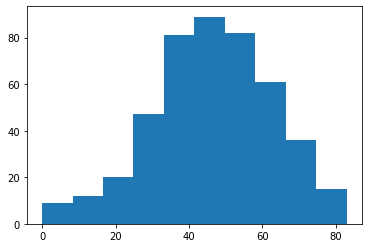

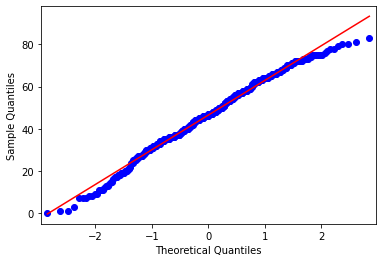

Shapiro Wilk: Sample does not look Gaussian (reject H0)
D'Agostino: Sample does not look Gaussian (reject H0)
Anderson: data does not look Gaussian at significance level 15.0 (reject H0)
Anderson: data does not look Gaussian at significance level 10.0 (reject H0)
Anderson: data does not look Gaussian at significance level 5.0 (reject H0)
Anderson: data looks Gaussian at significance level 2.5 (fail to reject H0)
Anderson: data looks Gaussian at significance level 1.0 (fail to reject H0)

** Distribution of Height **


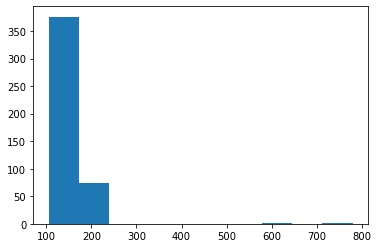

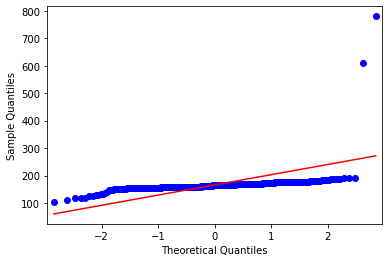

Shapiro Wilk: Sample does not look Gaussian (reject H0)
D'Agostino: Sample does not look Gaussian (reject H0)
Anderson: data does not look Gaussian at significance level 15.0 (reject H0)
Anderson: data does not look Gaussian at significance level 10.0 (reject H0)
Anderson: data does not look Gaussian at significance level 5.0 (reject H0)
Anderson: data does not look Gaussian at significance level 2.5 (reject H0)
Anderson: data does not look Gaussian at significance level 1.0 (reject H0)

** Distribution of Height (restricted to heights between 140 and 200) **


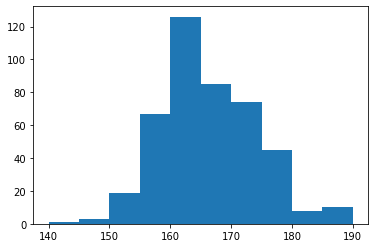

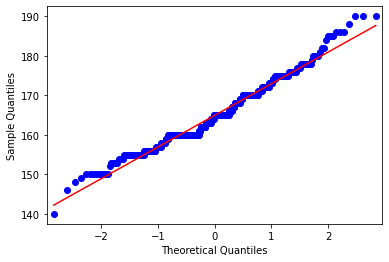

Shapiro Wilk: Sample does not look Gaussian (reject H0)
D'Agostino: Sample does not look Gaussian (reject H0)
Anderson: data does not look Gaussian at significance level 15.0 (reject H0)
Anderson: data does not look Gaussian at significance level 10.0 (reject H0)
Anderson: data does not look Gaussian at significance level 5.0 (reject H0)
Anderson: data does not look Gaussian at significance level 2.5 (reject H0)
Anderson: data does not look Gaussian at significance level 1.0 (reject H0)

** Distribution of Weight **


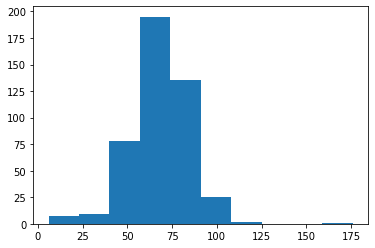

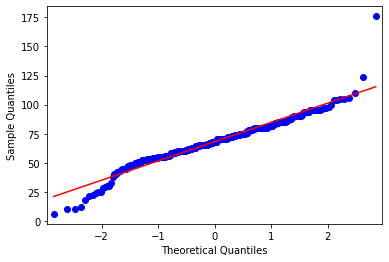

Shapiro Wilk: Sample does not look Gaussian (reject H0)
D'Agostino: Sample does not look Gaussian (reject H0)
Anderson: data does not look Gaussian at significance level 15.0 (reject H0)
Anderson: data does not look Gaussian at significance level 10.0 (reject H0)
Anderson: data does not look Gaussian at significance level 5.0 (reject H0)
Anderson: data does not look Gaussian at significance level 2.5 (reject H0)
Anderson: data does not look Gaussian at significance level 1.0 (reject H0)

** Distribution of Weight (restricted to weights between 30 and 110kgs) **


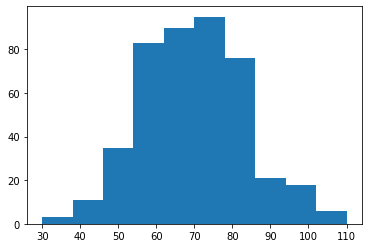

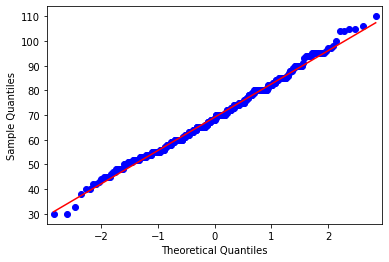

Shapiro Wilk: Sample looks Gaussian (fail to reject H0)
D'Agostino: Sample looks Gaussian (fail to reject H0)
Anderson: data does not look Gaussian at significance level 15.0 (reject H0)
Anderson: data does not look Gaussian at significance level 10.0 (reject H0)
Anderson: data does not look Gaussian at significance level 5.0 (reject H0)
Anderson: data looks Gaussian at significance level 2.5 (fail to reject H0)
Anderson: data looks Gaussian at significance level 1.0 (fail to reject H0)


In [49]:
import pandas as pd

# import arrhythmia data from http://archive.ics.uci.edu/ml/datasets/Arrhythmia
filename = '20 arrhythmia.csv'
data = pd.read_csv(filename)

# Age
x = data['Age']
print('** Distribution of Age **')
do_tests(x)

# Height
x = data['Height']
print('\n** Distribution of Height **')
do_tests(x)

# Now restrict heights to those between 140 and 200
df = data[(data.Height >= 140) & (data.Height <= 200)]
x = df['Height']
print('\n** Distribution of Height (restricted to heights between 140 and 200) **')
do_tests(x)

# Weight
x = data['Weight']
print('\n** Distribution of Weight **')
do_tests(x)

# Now restrict weights to those between 30 and 110kgs
df = data[(data.Weight >= 30) & (data.Weight <= 110)]
x = df['Weight']
print('\n** Distribution of Weight (restricted to weights between 30 and 110kgs) **')
do_tests(x)
